# Weak Convergence and Optimal Scaling of Random Walk Metropolis Algorithms

<div style="text-align: right"> Peng-Wei CHEN</div>

### Abstract
This paper provides a theoretical results for the best scaling proposal and the accept/reject ratios for the Metropolis-Hastings Algorithm with certain conditions:
 1. Having the same distribution according to different coordinates ($f$)
 2. (A1) $\mathbb{E}_f \left[ \left( \frac{f'(X)}{f(X)}\right)^8 \right] = M < \infty$
 3. (A2) $\mathbb{E}_f \left[ \left( \frac{f''(X)}{f(X)}\right)^4 \right] < \infty$
 2. We suppose the random walk is chosen by a Gaussian proposal density.

The results show that for any coordinates of the resulting simulations, the one-dimensional process converges weakly to a Langevin diffusion. We can thus find the optimal rate by solving this Langevin equation.

### Algorithme

To be clearer, consider a n-dimension random variable $X^n$. Let the density function be 
$$ \pi_n(x^n) = \prod_{i=1}^n f(x^n_i) $$
and the proposal density as follows:
$$q_n(x^n, y^n) = \frac{1}{(2\pi\sigma^2_n)^{n/2}} exp\left\{  \frac{-1}{2\sigma^2_n} |y^n - x^n|^2 \right\} $$
which is a n-dimension Gaussian law with mean $= x^n$ and standard-type $ = \sigma_n^2$.


By taking the acceptance function
$$ \alpha(X^n_{m-1}, Y^n) = 1 \wedge \frac{\pi_n (Y^n)}{\pi_n (X^n_{m-1})} $$
we have thus the Metropolis Hasting algorithm for the random walk, where the deduced Markov chain is ergodic with respect to $\pi_n$.

### Theoretical results
The main result of this paper is to show that the best variance to choose is (the factor (n-1) can be replaced by (n))
$$ \sigma^2_n = \frac{l^2}{(n-1)}$$
where
$$ l = \frac{2.38}{\sqrt{I}} $$
and
$$ I = \mathbb{E}_f \left[ \left( \frac{f'(X)}{f(X)} \right)^2 \right] $$

### Interest while practicing

In [8]:
%matplotlib inline
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

np.random.seed(0)

We define the instance for the simulation with the following class:

In [25]:
class Metropolis_Hastings:
    def __init__(self, n, m, l, f, DEBUG=False):
        self.n = n
        self.m = m
        self.l = l
        self.f = np.vectorize(f)
        self.DEBUG = DEBUG
    
    def __call__(self, l=None, X_0=None):
        self.run(l, X_0)
        return self
    
    def pi(self, x):
        return np.prod(self.f(x))
    
    def alpha(self, X_last, Y):
        return min(1, self.pi(Y) / self.pi(X_last))
    
    def run(self, l = None, X_0=None):
        if l is None:
            n, m, l, pi, alpha = self.n, self.m, self.l, self.pi, self.alpha
        else:
            n, m, pi, alpha = self.n, self.m, self.pi, self.alpha
        sigma_n = l ** 2 / (n-1)
        if X_0 is None:
            X_0 = np.random.normal(size=n)
        random_state = np.random.normal(size=(m, n))
        U = np.random.uniform(size=m)

        # Run Metropolis random walk algorithm.
        results = np.zeros(shape=(m+1, n))
        pi_x = np.zeros(shape=(m, n))
        results[0] = X_0
        accepted = 0
        for i in tqdm(range(m)):
            potential_next_y = results[i] + sigma_n * random_state[i]
            potential = alpha(results[i], potential_next_y)
            if U[i] < potential:
                results[i+1] = potential_next_y
                accepted += 1
            else:
                results[i+1] = results[i]
            if self.DEBUG and np.linalg.norm(results[i+1]) > 5:
                print(np.linalg.norm(results[i+1]), results[i], results[i+1], potential, pi(results[i]), pi(potential_next_y))
            pi_x[i] = pi(results[i])
        print("Accepted rate : {}".format(accepted / m))
        self.accepted_rate = accepted / m
        self.simulation = results
        self.pi_x = pi_x
        return accepted / m, results, pi_x

    def plot_hist(self, bins_cut = 40, x_cut = 1000, bot = -5, top = 5):
        plt.hist(self.simulation[:, 0], bins=np.linspace(bot, top, bins_cut), density=True)
        x = np.linspace(bot, top, x_cut)
        plt.plot(x, [self.f(x_) for x_ in x])
        plt.show()
    
    def plot_simulation(self):
        plt.plot(self.simulation[:, 0])
        plt.show()

In [26]:
maximum = 1
def f1(x_i):
    if np.abs(x_i) < 1e-5:
        return maximum
    else:
        return min(maximum, 1/np.abs(x_i) ** 3)

def f2(x_i):
    return norm.pdf(x_i)

def f3(x_i):
    return norm.pdf(x_i, loc=2, scale=1.414)

In [28]:
%%time
instance = Metropolis_Hastings(n=2, m=int(1e4), l=0.01, f=f3)()
instance.plot_hist()
instance.plot_simulation()

  0%|          | 0/10000 [00:00<?, ?it/s]

Accepted rate : 0.9997


AttributeError: 'NoneType' object has no attribute 'plot_hist'

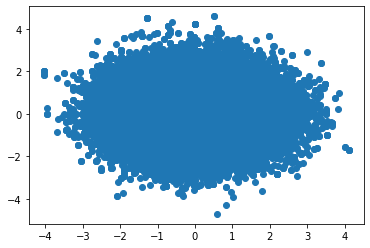

In [152]:
plt.scatter(results[:, 0], results[:, 1])

In [ ]:
# Best case
def I_cal():
    return 1
    #return esp((f_derive(X) / f(X)) ** 2) over X

def psi(x):
    return norm.cdf(x)
    
def h(l):
    return 2 * l ** 2 * psi(-l * np.sqrt(I) / 2)

l = 2.38 / np.sqrt(I)